In [23]:
import cv2

In [24]:
from deepface import DeepFace

In [25]:
img=cv2.imread('happy_boy.jpeg')

In [26]:
import matplotlib.pyplot as plt

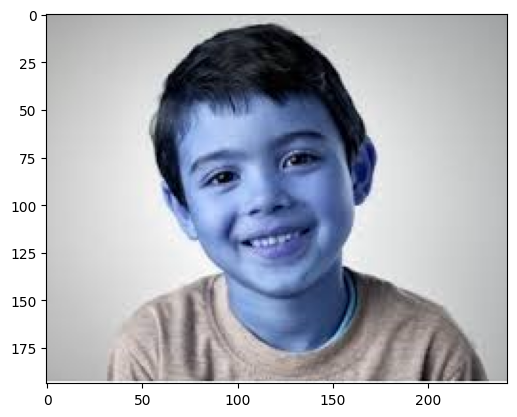

In [27]:
plt.imshow(img)

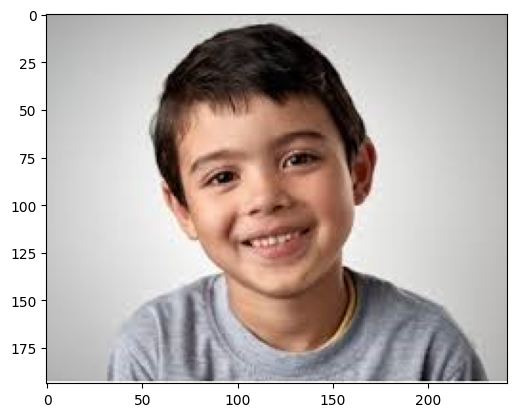

In [28]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [29]:
predictions=DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]  


In [30]:
predictions

[{'emotion': {'angry': np.float32(8.055325e-08),
   'disgust': np.float32(7.070462e-16),
   'fear': np.float32(3.09346e-09),
   'happy': np.float32(98.185455),
   'sad': np.float32(5.73183e-06),
   'surprise': np.float32(7.245674e-05),
   'neutral': np.float32(1.8144665)},
  'dominant_emotion': 'happy',
  'region': {'x': 56,
   'y': 36,
   'w': 112,
   'h': 112,
   'left_eye': (130, 76),
   'right_eye': (91, 86)},
  'face_confidence': np.float64(0.94),
  'age': 17,
  'gender': {'Woman': np.float32(0.42002028), 'Man': np.float32(99.57999)},
  'dominant_gender': 'Man',
  'race': {'asian': np.float32(8.102794),
   'indian': np.float32(1.8552929),
   'black': np.float32(0.118675955),
   'white': np.float32(43.102497),
   'middle eastern': np.float32(10.015731),
   'latino hispanic': np.float32(36.805008)},
  'dominant_race': 'white'}]

In [31]:
type(predictions)

list

In [32]:
desired_emotions = [prediction['dominant_emotion'] for prediction in predictions]

In [33]:
desired_emotions

['happy']

# we are trying to draw a rectangle across the face

In [34]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [35]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
	#print(faceCascade.empty())
faces=faceCascade.detectMultiScale(gray, 1.1,4)
	#Draw a rectangle around te faces
for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

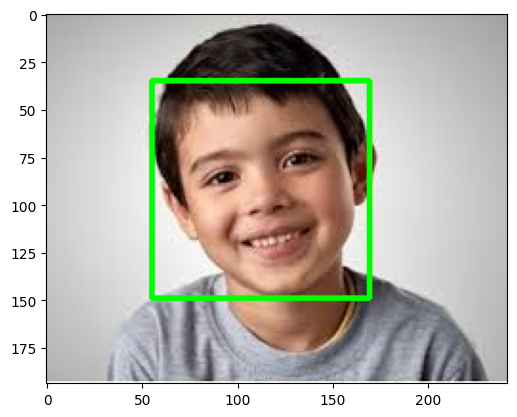

In [36]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [37]:
font= cv2.FONT_HERSHEY_SIMPLEX

	#Use put fext() method for
    #inserting text on video

cv2.putText(img,
            	predictions[0]['dominant_emotion'],
                        (0, 50),
                        font, 1,
                        (0, 0, 255),
                        2,
                        cv2.LINE_4) ;

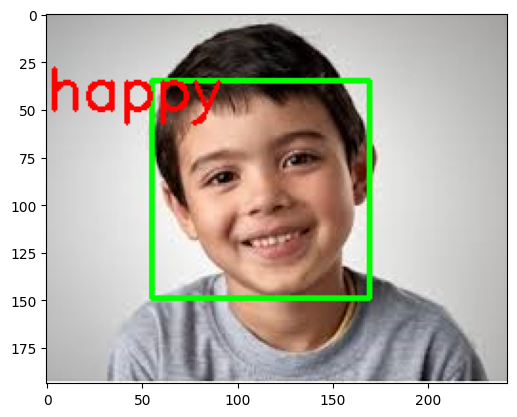

In [38]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [39]:
img1=cv2.imread('fear_women.jpg')

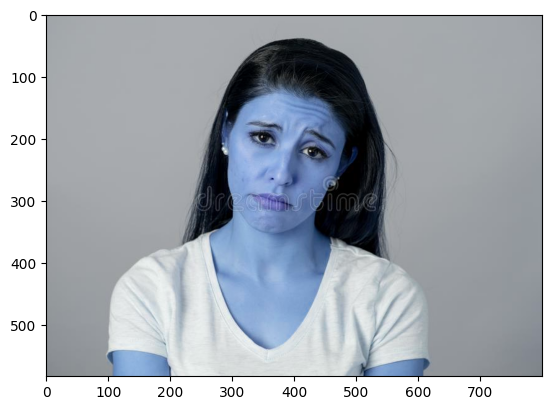

In [40]:
plt.imshow(img1)

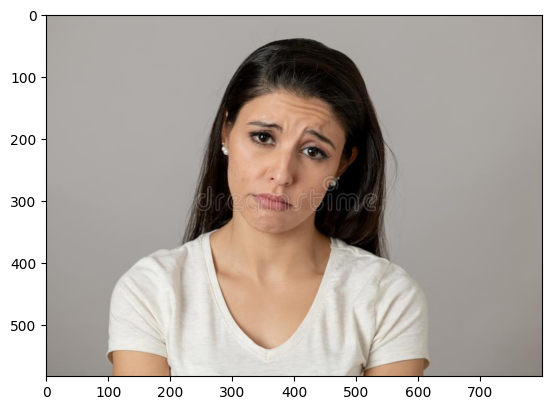

In [41]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [42]:
predictions=DeepFace.analyze(img1)

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]  


In [43]:
predictions

[{'emotion': {'angry': np.float32(2.400663),
   'disgust': np.float32(1.486227e-05),
   'fear': np.float32(3.4518547),
   'happy': np.float32(2.4248307e-05),
   'sad': np.float32(44.554276),
   'surprise': np.float32(7.578959e-05),
   'neutral': np.float32(49.593094)},
  'dominant_emotion': 'neutral',
  'region': {'x': 271,
   'y': 115,
   'w': 239,
   'h': 239,
   'left_eye': (429, 223),
   'right_eye': (347, 199)},
  'face_confidence': np.float64(0.93),
  'age': 32,
  'gender': {'Woman': np.float32(99.44714), 'Man': np.float32(0.5528572)},
  'dominant_gender': 'Woman',
  'race': {'asian': np.float32(0.784369),
   'indian': np.float32(0.9193402),
   'black': np.float32(0.0832739),
   'white': np.float32(65.24277),
   'middle eastern': np.float32(16.573826),
   'latino hispanic': np.float32(16.396425)},
  'dominant_race': 'white'}]

In [44]:
import cv2 ### pip install opencv-python ## pip install opencv-contrib-python fullpackage 
from deepface import DeepFace ## pip install deepface

faceCascade =cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(1)
#Check if the webcam is opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture (0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame=cap.read()
    result = DeepFace.analyze (frame, actions=['emotion'], enforce_detection=False)
    
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print (faceCascade.empty()) 
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    #Draw a rectangle around the faces
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    #Use putText() method for
    # inserting text on video
    cv2.putText(frame,
                result[0]['dominant_emotion'],
                (50, 50),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4)
    cv2.imshow('Demo video', frame)
          
    if cv2.waitKey(2) & 0xFF== ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 